# Advanced Machine Learning Semester Exam 
<p>Section B</p>
<p>NAML84112: ADVANCED MACHINE LEARNING</p>
<p>Sol Plaatje University</p>
<p>BSc. Hons. in Data Science</p>
<p>Kyle Groenewald</p>
<p>Student no.: 201710099</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Objective

The objective of this work is to model the probability that water being tested is fit for human consumption. Probabilistic models are built using probabilities and attempt to quantify uncertainty. The uncertainty in this specific case is the uncertainty of water to be safe to consume i.e. the potablility of water. Using Bayes' theorem, it is inferred that

P(potability | all the feature variables) = P(all the feature variables | potability) * P(potability) / P(all the feature variables)

# Preprocessing

In [2]:
data = pd.read_csv("C:\\Users\\Kyle\\Downloads\\Exam_data.csv", sep = ';')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# As we can see from the head, there are NaN values
# The target variable, since we are modelling water consumption, would then be potability. We will take 0 as unfit to drink,
# and 1 as fit to drink.

In [5]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
# Uneven data counts, likely because of missing values. We'll drop the rows with missing values, and then further investigate.

In [9]:
df = data.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [11]:
# Missing values have been removed, and we have even data counts.

In [12]:
df = df.rename(columns={'Potability': 'target'})

In [13]:
can_drink = df['target'][df['target']==1]
cannot_drink = df['target'][df['target']==0]

In [14]:
print(can_drink.value_counts())
print(cannot_drink.value_counts())

1    811
Name: target, dtype: int64
0    1200
Name: target, dtype: int64


In [15]:
# The target variable is distributed evenly enough.

In [16]:
# Now to build the model, we need to remove some variables.

<AxesSubplot:>

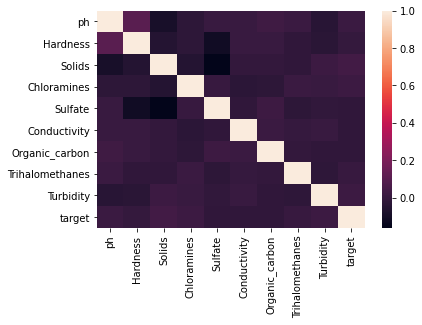

In [17]:
sns.heatmap(df.corr())

In [ ]:
# Little to no correlation between variables.

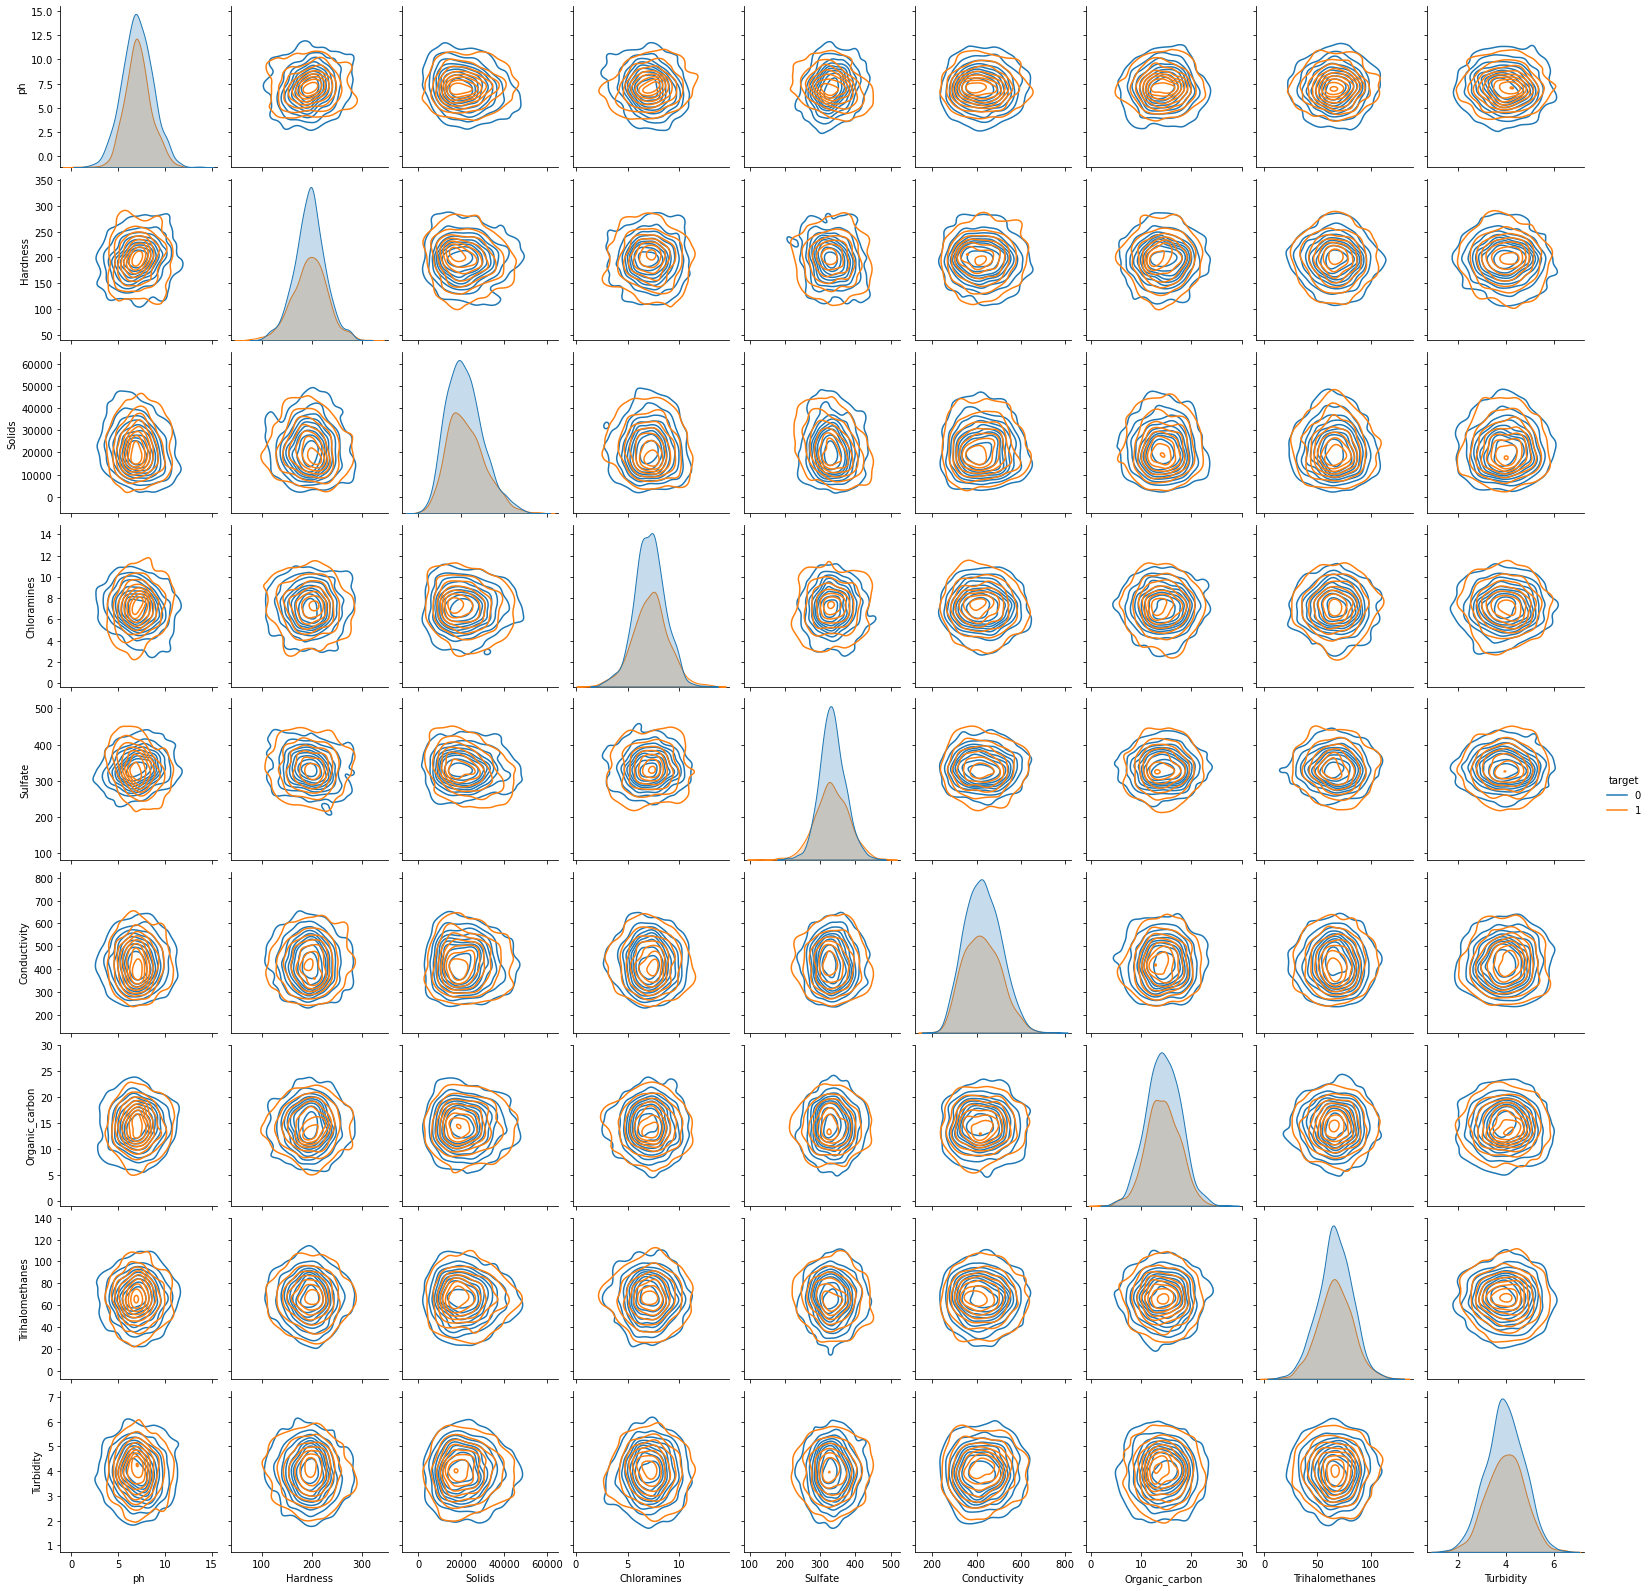

In [38]:
sns.pairplot(df,
            hue = 'target',
            kind = 'kde',
            diag_kind = 'auto')
plt.show()

In [ ]:
# Again we see no strong indicators of drinkability, nor correlation. The variables seem rather independent. For the purposes of
# builing a model, it is not feasible to include all variables.

In [41]:
df.corr()['target']

ph                 0.014530
Hardness          -0.001505
Solids             0.040674
Chloramines        0.020784
Sulfate           -0.015303
Conductivity      -0.015496
Organic_carbon    -0.015567
Trihalomethanes    0.009244
Turbidity          0.022682
target             1.000000
Name: target, dtype: float64

In [ ]:
# We will go with hardness, solids, turbidity. Since we are concerned with the safety of water consumption, 
# I have chosen these two variables as they are the easiest to recognize visually (only 2 variables selected due to constraints). Solids represent the
# total concentration of dissolved substances in water. Turbidity is the measure of relative clarity of a liquid.
# It is an optical characteristic of water, and is a measurement of the amount of light that is
# scattered by material in the water when a light is shined through the water sample. 
# The higher the intensity of scattered light, the higher the turbidity.

In [18]:
x_values = np.array(df[['Solids','Turbidity']])

In [19]:
x_values.shape

(2011, 2)

In [34]:
y_values = np.array(df['target'])

In [35]:
# subsetting data ONLY for hardware and time constraints, better models can be created from larger samples.

In [36]:
x = x_values[0:50]

In [37]:
y = y_values[0:50]

# Model 

In [32]:
import pymc3 as pm
import arviz as az

import theano as T
import theano.tensor as tt
import theano.tensor.nlinalg

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [51]:
# y = sigmoid(a + b1x1 + b2x2)
# 0 = a + b1x1 + b2x2
# x2 = -a/b2 + -b1/b2 * x1

In [38]:
with pm.Model() as model_lgr:
    a = pm.Normal('a', mu=0, sd=2)
    b = pm.Normal('b', mu=0, sd=2, shape=2)
    
    mu = a + pm.math.dot(x, b)
    
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    boundary = pm.Deterministic('boundary', -a/b[1] + -b[0]/b[1]*x[:,0])
    
    y_pred = pm.Bernoulli('y_pred', p=theta, observed=y)

In [64]:
with model_lgr:
    trace = pm.sample(2000)

<ipython-input-64-8f9d770f68da>:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 82 seconds.
There were 1363 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1096 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1551 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1277 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
No handles with labels found to put in legend.


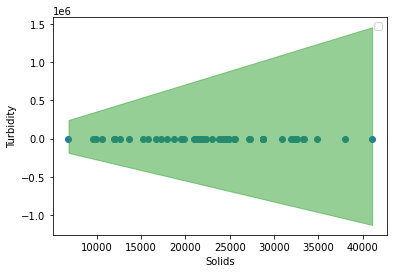

In [76]:
plt.scatter(x[:,0], x[:,1])


az.plot_hdi(x[:,0], trace['boundary'], color='C2', hdi_prob=0.98)

plt.xlabel("Solids")
plt.ylabel("Turbidity")
plt.legend()
plt.show()

In [ ]:
# Compared to other models

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [24]:
from sklearn.model_selection import train_test_split

predictors = x_values
target = y_values

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [26]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
loss_lr = mean_squared_error(Y_pred_lr, Y_test)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 62.53 %


In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [28]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
loss_nb = mean_squared_error(Y_pred_nb, Y_test)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 62.53 %


In [42]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [43]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
loss_svm = mean_squared_error(Y_pred_svm, Y_test)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 62.53 %


In [44]:
print("Loss for Logistic Reg Model: {:.4f}".format(loss_lr))
print("Loss for Naive Bayes Model: {:.4f}".format(loss_nb))
print("Loss for SVM Model: {:.4f}".format(loss_svm))

Loss for Logistic Reg Model: 0.3747
Loss for Naive Bayes Model: 0.3747
Loss for SVM Model: 0.3747


There is definitely something suspicious about the results but for the purpose of analysis I will take those to be accurate. The probabilistic model performs very poorly in terms of classification, with large uncertainties for a small set of values (which is to be expected) compared to the Logistic Regression, Naive Bayes and SVM classifiers which produce average success with the same set of data. The disadvantages outweigh the advantages with the probabilistic model, the simple Logistic, SVM and Naive Bayes perform well with the small dataset and can give a more definitive answer, which is important, given that we want to know if water is safe to drink, due too the nature of the estimates. 

In [ ]:
# Saving the model

In [39]:
import pickle

In [40]:
filename = 'finalized_model.pkl'
pickle.dump(model_lgr, open(filename, 'wb'))